In [3]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Laboratorio #2 - Daniel Conrado Monroy Madrid 16012674

In [0]:
import pandas as pd
import numpy as np
import re

In [5]:
path = "/content/drive/My Drive/TextM/"
file_name = 'tweets.csv'
print(path + file_name)
names = ["sentiment value","tw_id","tw_date","NO_Query","User","tweet"]
data = pd.read_csv(path+file_name,encoding='latin-1',names=names)

data.head()

/content/drive/My Drive/TextM/tweets.csv


,sentiment value,tw_id,tw_date,NO_Query,User,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment value    1600000 non-null int64
tw_id              1600000 non-null int64
tw_date            1600000 non-null object
NO_Query           1600000 non-null object
User               1600000 non-null object
tweet              1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
tweets = data['tweet']
tweets.head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: tweet, dtype: object

In [0]:
tuits_lista = tweets.to_list()
tuits_str = ",".join(tuits_lista)  #lista con todos los tweets unidos un solo string (tuits separados por coma).

In [0]:
def tweet_mentions(data):   #extrae las cuentas mencionadas dentro de los tweets
  reg = '@\w{1,15}'
  test = re.findall(reg,data)
  return test

In [0]:
cuentas = tweet_mentions(tuits_str)  #lista con todas las cuentas de Twitter que fueron mencionadas(Ej:@switchfoot)

In [0]:
cuentas_series = pd.Series(cuentas) #lista de cuentas convertida en un pandas Series. 

In [12]:
cuentas_series.head()

0         @switchfoot
1           @Kenichan
2    @nationwideclass
3           @Kwesidei
4           @LOLTrish
dtype: object

In [13]:
count_cuentas = pd.DataFrame(cuentas_series.value_counts()).T #Dataframe con los usuarios y el conteo de menciones de cada uno. 
count_cuentas

,@mileycyrus,@tommcfly,@ddlovato,@DavidArchie,@Jonasbrothers,@jordanknight,@DonnieWahlberg,@mitchelmusso,@JonathanRKnight,@taylorswift13,@jonasbrothers,@selenagomez,@dougiemcfly,@peterfacinelli,@aplusk,@joeymcintyre,@Dannymcfly,@gfalcone601,@shaundiviney,@YoungQ,@kirstiealley,@TomFelton,@stephenfry,@iamdiddy,@officialTila,@lilyroseallen,@ashleytisdale,@johncmayer,@AlexAllTimeLow,@dannywood,@PerezHilton,@Pink,@souljaboytellem,@andyclemmensen,@dannygokey,@markhoppus,@petewentz,@TheRealJordin,@KimKardashian,@Wossy,...,@taylorswif13,@siccjordans,@EighthHorcrux,@Snaresondeck,@melissahelene,@vivianag4,@Diadoll,@msumrall4,@wtccishot,@JRGarciaonline,@parkerkrhoyt,@nailataryam,@lynshehua_99,@RobbyTomson,@zemouk,@Dylan552,@SharePointWrTSF,@Ars_Electronica,@gonduras,@bad_ol_tally,@Gunjan_Joshi,@Wintermuteband,@hapagirl,@threemilesdown,@SherylAnneS,@spekksliite,@jessicalynhowe,@samaracb,@urbansix,@dnisbet,@socorose,@lightalloy,@the_book_freak,@Reesemcblox,@aretemisrex,@robgibo,@epistemic_murk,@DavidsJosephine,@Smiffla,@got80s
0,4500,3887,3467,1299,1287,1130,1104,1077,1074,1011,986,801,794,637,624,578,546,540,511,507,434,428,420,398,390,387,386,381,375,368,365,347,347,342,341,338,333,329,327,322,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
top3 = count_cuentas.columns[0:3].tolist() #Los 3 tuiteros más populares
top3

['@mileycyrus', '@tommcfly', '@ddlovato']

In [0]:
miley = data[data['tweet'].str.contains(top3[0],regex=False)] #Extrae todos los tuits donde se menciona a Miley Cyrus (1 en el top3) conservando la metadata del tweet.
mcfly = data[data['tweet'].str.contains(top3[1],regex=False)] #Extrae todos los tuits donde se menciona a Tom McFly (2 en el top3) conservando la metadata del tweet.
demi = data[data['tweet'].str.contains(top3[2],regex=False)] #Extrae todos los tuits donde se menciona a Demi Lovato (3 en el top3) conservando la metadata del tweet.

In [0]:
def lengths(df): #La función devuelve una columna con el lenght de cada uno de los tweets.
  len_column = df['tweet'].str.len()
  return len_column

In [0]:
def corpus(data):
  df = data.drop(columns=['sentiment value', 'NO_Query','User'])  #Eliminar columnas que no se incluyen en el Corpus
  df['Length'] = lengths(data) #Agrega columna con el length de cada tweet al dataframe
  df.columns = ['ID (Metadata)','Timestamp (Metadata)','Tweet (Content)','Length (Metadata)'] #modificar nombre de columnas
  df = df[['Tweet (Content)','ID (Metadata)','Timestamp (Metadata)','Length (Metadata)']] #Reordenar las columnas
  return df

In [0]:
pruebacorpus = corpus(miley)

In [0]:
miley_corpus = corpus(miley)
mcfly_corpus = corpus(mcfly)
demi_corpus = corpus(demi)

In [19]:
miley_corpus[0:2]

,Tweet (Content),ID (Metadata),Timestamp (Metadata),Length (Metadata)
1021,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107
2014,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,137


In [20]:
mcfly_corpus[0:2]

,Tweet (Content),ID (Metadata),Timestamp (Metadata),Length (Metadata)
1690,@tommcfly hey saw u guys play @ pushover..didn...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138
1789,@tommcfly Good morning Tom! Why can't I send y...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131


In [21]:
demi_corpus[0:2]

,Tweet (Content),ID (Metadata),Timestamp (Metadata),Length (Metadata)
460,@ddlovato @David_Henrie ummmmm i cant find it.,1467929230,Mon Apr 06 22:51:34 PDT 2009,47
573,@ddlovato Do you hate us?? Please don't,1467953367,Mon Apr 06 22:58:30 PDT 2009,40


A partir de aquí se limpia la data (tweets) para poder realizar el WordCloud.

In [0]:
import nltk

In [0]:
import string

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def clean_text(data,nombre,nombre2):  #La función todos los tweets modificados como un solo string. Recibe como entrada el corpus.
  tolower = data['Tweet (Content)'].apply(lambda x: x.lower()) #Todas las letras se convierten en minúsculas
  translator_puntos = str.maketrans('', '', string.punctuation)
  nopuntos = tolower.apply(lambda x: x.translate(translator_puntos)) #Remove punctuation
  translator_numbers = str.maketrans('', '', string.digits)
  nodigits = nopuntos.apply(lambda x: x.translate(translator_numbers)).to_list() #Remove numbers
  nodigits_str = ' '.join(nodigits)
  remove_spaces = " ".join(nodigits_str.split()) #Remove duplicated spaces
  stop_words = set(stopwords.words('english')) #Eliminar stopwords
  words = word_tokenize(remove_spaces)
  new = []
  for w in words:
    if w not in stop_words:
        new.append(w)
        
  df = pd.DataFrame(new,columns=['words'])
  df1 = df[(df['words'] != nombre) & (df['words'] != nombre2)] #nombre es el usuario que también se debe borrar para evitar la alta frecuencia que tiene. Nombre 2 es el nombre de la persona que tambíen se debe remover debido a la frecuencia. 
  lista = pd.Series(df1['words']).to_list()
  str1 = ' '.join(lista) #string con las stopwrods removidas. 
  ps = PorterStemmer() #Stemming
  words_stem = word_tokenize(str1)
  stemming = []
  for w in words_stem:
    stemming.append(ps.stem(w))
    
  lema = WordNetLemmatizer() #lemmatization
  lem = []
  for w in stemming:
    lem.append(lema.lemmatize(w,pos='v'))
    
  return ' '.join(lem) #Resultado para construir el WordCloud

Ahora se construye el wordcloud.

In [0]:
miley_words = clean_text(miley_corpus,'mileycyrus','miley')
mcfly_words = clean_text(mcfly_corpus,'tommcfly','tom')
demi_words = clean_text(demi_corpus,'ddlovato','demi')

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

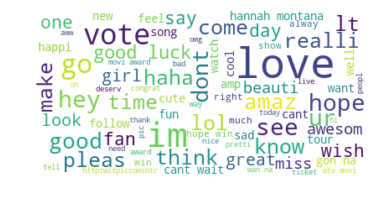

In [54]:
wordcloud_miley = WordCloud(max_font_size=50, max_words=80, background_color="white").generate(miley_words)
plt.figure()
plt.imshow(wordcloud_miley, interpolation="bilinear")
plt.axis("off")
plt.show()


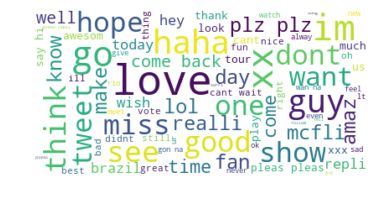

In [55]:
wordcloud_mcfly = WordCloud(max_font_size=50, max_words=80, background_color="white").generate(mcfly_words)
plt.figure()
plt.imshow(wordcloud_mcfly, interpolation="bilinear")
plt.axis("off")
plt.show()


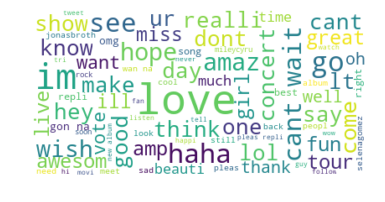

In [56]:
wordcloud_demi = WordCloud(max_font_size=50, max_words=80, background_color="white").generate(demi_words)
plt.figure()
plt.imshow(wordcloud_demi, interpolation="bilinear")
plt.axis("off")
plt.show()

**Conclusión**: Para los 3 usuarios la palabra que más sobresale en los wordclouds es LOVE. Tambiés es curioso que la palabra HOPE tiene alta frecuencia en los 3. Los seguidores usualmente etiquetan a las celebridades para demostrar mensajes de afecto y apoyo a los mismos, tal como sugiere la visualización de las palabras.